In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
url = "https://www.cupoy.com/newsfeed/topstory"
browser = webdriver.Chrome()
SCROLL_PAUSE_TIME = 1
news_dict = {}

In [2]:
def get_title():
    global news_dict
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")
    all_news = soup.find_all("div", attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})
    for news in all_news:
        title = news.a["title"]
        news_url = news.a["href"]
        news_dict[str(title)]= str(news_url)

In [3]:
browser.get(url) 
time.sleep(3)
last_height = browser.execute_script("return document.body.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = browser.execute_script("return document.body.scrollHeight")
    last_height = new_height
    get_title()
    l = len(news_dict)
    # print("news_length:",l)
    if l >= 700:
        break

In [4]:
import pandas as pd
pd.DataFrame(list(news_dict))

,0
0,武漢肺炎疫情升溫耳溫槍賣光光！食藥署提醒：量耳溫沒「戴套」恐增傳染風險-風傳媒
1,慢就是快，教你四招放輕鬆才會效率高 | 知 識 家
2,武漢肺炎死亡首例載過「中港澳返國臺商」 陳時中：找到接觸史就不算社區感染-風傳媒
3,孩子長大了，為什麼都不愛回家？他吐露遊子心聲：這種教養方式，只會讓親子關係愈來愈疏離-風傳媒
4,武漢肺炎風暴》網傳「零號病人」是武漢病毒研究所女研究生？所方回應：目前無人感染-風傳媒
...,...
700,防幼兒感染怎麼做？堅守用防風罩、不給手機等6原則
701,這樣放閃不惹人厭！八大情侶超美甜蜜合照 - MOOK景點家 - 墨刻出版 華文最大旅遊資訊平臺
702,牛排控必吃的4家「巨人排餐」！時間內吃完120盎司獎金5000元，大胃女孩快來 | 牛排、大...
703,中共洗腦部總管王滬寧正在反轉瘟疫輿論--上報


In [5]:
def getContent(link_url):
    article = ""
    resp = requests.get(link_url)
    resp.encoding = 'utf-8'
    soup = BeautifulSoup(resp.text, 'lxml')
    news_content = soup.find_all("p")
    for p in news_content:
        if ((p.string) is not None):
            article += p.string
    # print(article)
    return article

In [6]:
news_content = {}
for title, news_url in news_dict.items():
    try:
        content = getContent(news_url)
        if len(content) < 200:
            continue
        news_content[title] = content
    except:
        pass

In [7]:
import json
with open('news.json', 'w', encoding="utf-8") as json_file:
        json.dump(news_content, json_file, indent=4, ensure_ascii=False)

In [12]:
import jieba
import jieba.analyse
jieba.set_dictionary('./dict.txt.big')
dic = {}
content = ""

with open('news.json', 'r') as json_file:
    dic = json.load(json_file)

for title, article in dic.items():
    content += title + article

with open('content.txt', 'w') as f:
    f.write(content)

jieba.analyse.set_stop_words("stop_words.txt")
tags = jieba.analyse.extract_tags(content, 100)
print(" ".join(tags))

Building prefix dict from /Users/oliver/Desktop/Github/1st-PyCrawlerMarathon/CUPOY/dict.txt.big ...
Loading model from cache /var/folders/wp/hqrj4fw972s76k6mt5blv4yh0000gn/T/jieba.u3e02e943719603cd9f9548568d8d74ac.cache
Loading model cost 1.797 seconds.
Prefix dict has been built successfully.
台灣 中國 武漢 美國 肺炎 發現 疫情 運動 身體 未來 投資 機會 國家 人們 孩子 分享 市場 改變 可能 工作 設計 網站 旅遊 情況 團隊 發生 產業 超過 歡迎 當時 寶寶 Marc Jacobs 電影 決定 發展 建議 特別 人類 過去 New 日本 企業 生活 防疫 資訊 YORK runway York 過程 感覺 經驗 國際 Slaven 這麼 確診 社區 簡單 持續 網路 需要 產生 朋友 治療 別人 擁有 討論 關鍵 內容 進入 出來 歷史 根據 NBA 球員 英國 對方 想要 真的 報導 服務 口罩 韓國 總是 系統 導致 紀錄 技術 隔離 產品 動作 的話 廣告 幫助 19 體驗 媒體 經營 知道 風險


In [9]:
table = []
dic = {}
for tag in tags:
    dic[tag]=content.count(tag)
    table.append({"Word":tag, "Count":content.count(tag)})
table.sort(key=lambda x:x["Count"], reverse = True)

In [10]:
import pandas as pd
pd.DataFrame(table)
# table = pd.Series(table)
# table.to_frame()


,Word,Count
0,台灣,524
1,可能,458
2,中國,434
3,工作,422
4,不是,369
...,...,...
95,動作,90
96,韓國,88
97,總是,86
98,導致,86


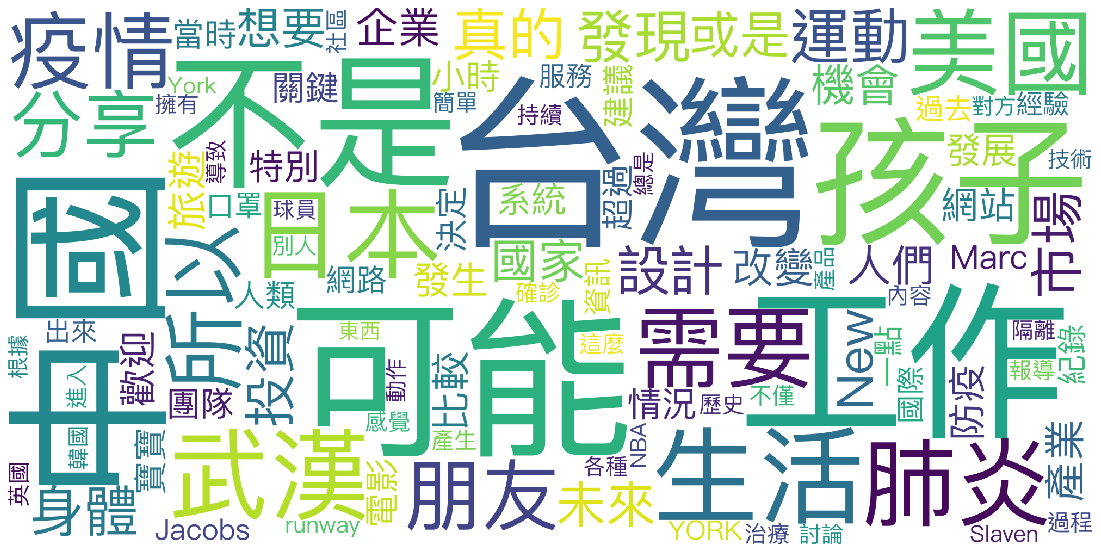

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
font = "PingFang.ttc"
wc = WordCloud(background_color='white',font_path=font, width=2000, height=1000)
wc.generate_from_frequencies(dic)
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()